In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [8]:
# Time of particle propagation in uniform magnetic field
# (unit charge assumed, |q| = 1e !)

# Magnetic field [T]
B = 3.5

# Distance [m]
d = 1.8

# Speed of light [m/s]

c = 3E+08    

In [9]:
# Propagation time for given momentum [GeV/c] and mass [GeV/c^2]

def propTime(p,m) :
    
    # Particle velocity (in c units)
    
    beta = p/np.sqrt(p*p+m*m)
    
    # Curvature radius in magnetic field [m]
    
    R = p/B * 1E+09/c       # Additional numerical factor from G(eV)
    
    if R > d/2 :
        l = 2*R*np.arcsin(d/2./R)
        t = l/(beta*c)
        
    else:
        t = -1              # curvature too small

    return t

In [10]:
def recMass(p,t) :
    
    # Curvature radius in magnetic field [m]
    
    R = p/B * 1E+09/c       # Additional numerical factor from G(eV)
    
    # Velocity as distance over time
    
    l = 2*R*np.arcsin(d/2./R)
    beta = l/t/c
    
    mass = p * np.sqrt((1/beta/beta - 1)*(beta>0)*(beta<1))
    
    return mass

In [14]:
# Generate multiple measurements with given measurement precision

dp = 1E-03  # Relative precision in momentum
dt = 3E-11  # Time measurement precision (30ps)

def mcGen(p,m,Nmc,dt):

    # Actual propagation time
    
    t = propTime(p,m)
    
    # Measured values
    
    tmeas = np.random.normal(loc=t, scale=dt, size=Nmc)
    pmeas = np.random.normal(loc=p, scale=p*dp, size=Nmc)
    
    mmeas = recMass(pmeas,tmeas)
    
    return mmeas

/tmp/ipykernel_10986/2786283719.py:9: RuntimeWarning: invalid value encountered in arcsin
  l = 2*R*np.arcsin(d/2./R)


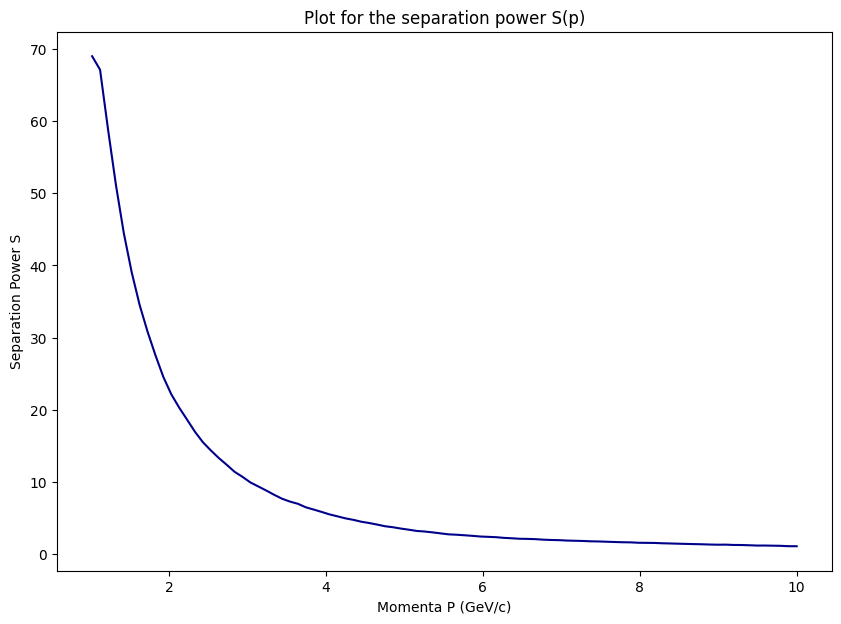

In [36]:
# Number of generations 

Nmc = 10000 

mK = 0.493677    # K+
mp = 0.938272    # p


# Particle momentum range,where we will run the mcGen to get the parameters to obtain the S function for each momenta
momentas=np.linspace(0.01,10,100)

S=[]

for p0 in momentas: 

    #We obtain te average and the deviation
    mcK = mcGen(p0,mK,Nmc,dt)
    mcp = mcGen(p0,mp,Nmc,dt)
    sk, sp = np.std(mcK), np.std(mcp)
    mean_k, mean_p = np.average(mcK), np.average(mcp)
    
    #Now we will
    S.append(np.abs(mean_k-mean_p)/np.sqrt(sk**2+sp**2))
   
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(momentas,S, color="darkblue")
ax.set_ylabel("Separation Power S")
ax.set_xlabel("Momenta P (GeV/c)")
ax.set_title("Plot for the separation power S(p)")
plt.show()


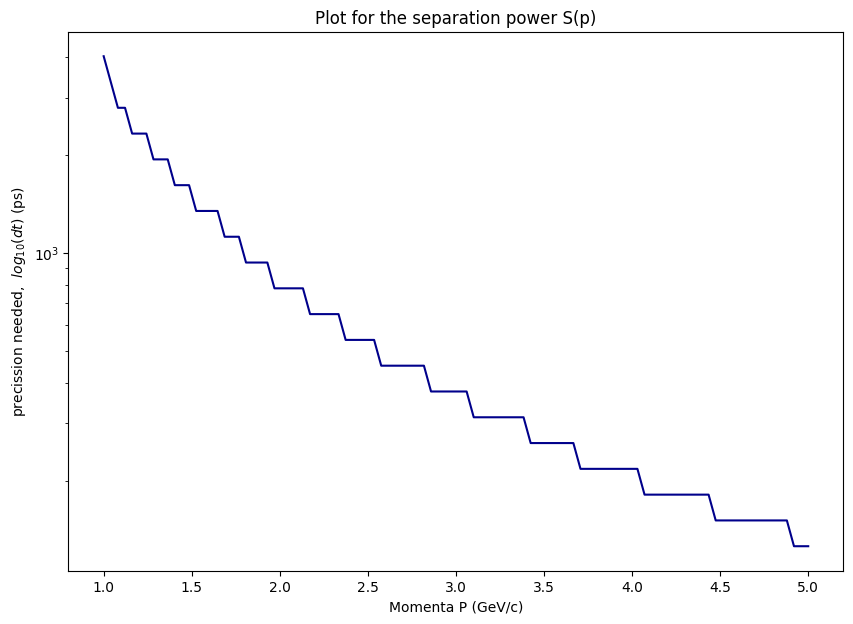

In [37]:
#Now we will set the following parameters for the second task, and vary dt till we get 3sigma

def time_separation(p0, mK, mp,Nmc, dt):
    mcK = mcGen(p0,mK,Nmc,dt)
    mcp = mcGen(p0,mp,Nmc,dt)
    sk, sp = np.std(mcK), np.std(mcp)
    mean_k, mean_p = np.average(mcK), np.average(mcp)
    
    #I do not know which of both sigmas to use so I use a cuadratic average
    average_sigma=np.sqrt(sk**2+sp**2)
    #And the central points for the separation will be its peaks
    separation=np.abs(mean_k-mean_p)/average_sigma
    return separation

momentas=np.linspace(1,5,100)
time=[]
for p in momentas:
    dt=1e-9
    while time_separation(p,mK,mp,Nmc,dt)<=3:
        dt=dt/1.2
    time.append(dt*(10e12))
fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(momentas,time, color="darkblue")
ax1.set_ylabel("precission needed,  $log_{10}(dt) $ (ps)")
ax1.set_xlabel("Momenta P (GeV/c)")
ax1.set_title("Plot for the separation power S(p)")
ax1.set_yscale("log")
plt.show()